## Importing Libraries

In [132]:
import pandas as pd
import matplotlib.pyplot as plt

## Loading files

In [133]:
df = pd.read_csv('steam.csv')
df.describe()

,appid,english,required_age,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,price
count,2.707500e+04,27075.000000,27075.000000,27075.000000,2.707500e+04,27075.000000,27075.000000,27075.00000,27075.000000
mean,5.962035e+05,0.981127,0.354903,45.248864,1.000559e+03,211.027147,149.804949,146.05603,6.078193
std,2.508942e+05,0.136081,2.406044,352.670281,1.898872e+04,4284.938531,1827.038141,2353.88008,7.874922
min,1.000000e+01,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.00000,0.000000
25%,4.012300e+05,1.000000,0.000000,0.000000,6.000000e+00,2.000000,0.000000,0.00000,1.690000
50%,5.990700e+05,1.000000,0.000000,7.000000,2.400000e+01,9.000000,0.000000,0.00000,3.990000
75%,7.987600e+05,1.000000,0.000000,23.000000,1.260000e+02,42.000000,0.000000,0.00000,7.190000
max,1.069460e+06,1.000000,18.000000,9821.000000,2.644404e+06,487076.000000,190625.000000,190625.00000,421.990000


## Adding a new column of net_ratings

In [134]:
df['net_ratings'] = df['positive_ratings'] - df['negative_ratings']
df.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,net_ratings
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19,121195
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99,2685
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99,3018
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99,1006
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99,4962


## Grouping dataset by Publishers and Separating free games from paid

In [135]:
# Group by Publishers
df2 = df.groupby('publisher').sum()

paid_df = df2.loc[df2['price'] > 0]
free_df = df2.loc[df2['price'] == 0]


## Top Tens

#### By average playtime

In [137]:
# paid
paid_games_avg_playtime_threshold = 43500
top_most_played_paid_df = paid_df.loc[paid_df['average_playtime'] > paid_games_avg_playtime_threshold]
print(f'Top {len(top_most_played_paid_df)} paid publishers, by the average playtime, threshold of {paid_games_avg_playtime_threshold} minutes')
#print(format_publishers_names(top_most_played_paid_df))
# free
free_games_avg_playtime_threshold = 11200
top_most_played_free_df = free_df.loc[free_df['average_playtime'] > free_games_avg_playtime_threshold]
print(f'Top {len(top_most_played_free_df)} free publishers, by the average playtime, threshold of {free_games_avg_playtime_threshold} minutes')
#print(format_publishers_names(top_most_played_free_df))



Top 10 paid publishers, by the average playtime, threshold of 43500 minutes
Top 10 free publishers, by the average playtime, threshold of 11200 minutes


#### Plots

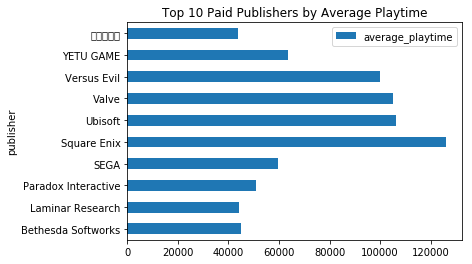

In [138]:
plot = top_most_played_paid_df.plot(y='average_playtime', kind='barh', title=f'Top {len(top_most_played_paid_df)} Paid Publishers by Average Playtime')
plt.show()

fig = plot.get_figure()
fig.savefig('Top Paid Publishers by Average Playtime',dpi=200, bbox_inches='tight')


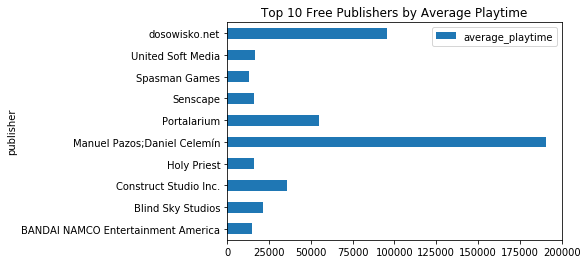

In [139]:
plot = top_most_played_free_df.plot(y='average_playtime', kind='barh', title=f'Top {len(top_most_played_free_df)} Free Publishers by Average Playtime')
plt.show()

fig = plot.get_figure()
fig.savefig('Top Free Publishers by Average Playtime',dpi=200,bbox_inches='tight')

#### By positive rankings

In [140]:
# paid
paid_games_positive_ratings_threshold = 260000
top_positive_ratings_paid_df = paid_df.loc[paid_df['positive_ratings'] > paid_games_positive_ratings_threshold]
print(f'Top {len(top_positive_ratings_paid_df)} paid publishers, by the postive ratings, threshold of {paid_games_positive_ratings_threshold}')


# free
free_games_positive_ratings_threshold = 45200
top_positive_ratings_free_df = free_df.loc[free_df['positive_ratings'] > free_games_positive_ratings_threshold]
print(f'Top {len(top_positive_ratings_free_df)} free games by publishers, by the postive ratings, threshold of {free_games_positive_ratings_threshold}')


Top 10 paid publishers, by the postive ratings, threshold of 260000
Top 10 free games by publishers, by the postive ratings, threshold of 45200


#### Plots

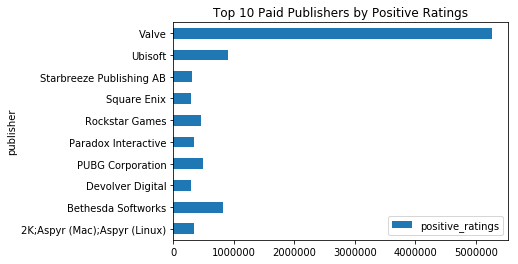

In [141]:
plot =top_positive_ratings_paid_df.plot(y='positive_ratings', kind='barh', title=f'Top {len(top_positive_ratings_paid_df)} Paid Publishers by Positive Ratings')
plt.show()

fig = plot.get_figure()
fig.savefig('Top Paid Publishers by Positive Ratings',dpi=200, bbox_inches='tight')


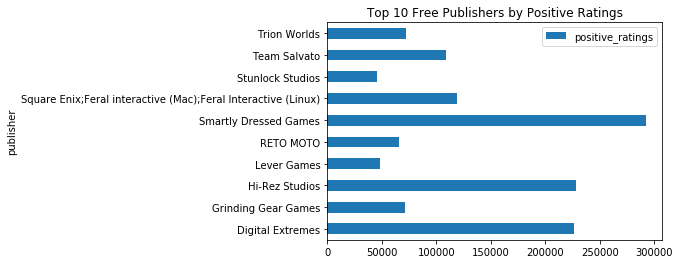

In [142]:
plot = top_positive_ratings_free_df.plot(y='positive_ratings', kind='barh', title=f'Top {len(top_positive_ratings_free_df)} Free Publishers by Positive Ratings')
plt.show()

fig = plot.get_figure()
fig.savefig('Top Free Publishers by Positive Ratings',dpi=200, bbox_inches='tight')


#### By dislikes

In [143]:
# paid
most_disliked_paid_threshold = -950
top_disliked_paid_df = paid_df.loc[paid_df['net_ratings'] < most_disliked_paid_threshold]
print(f'Top {len(top_disliked_paid_df)} disliked paid publishers, by the dislike threshold of {most_disliked_paid_threshold}')

# free
most_disliked_free_threshold = -207
top_disliked_free_df = free_df.loc[free_df['net_ratings'] < most_disliked_free_threshold]
print(f'Top {len(top_disliked_free_df)} disliked free publishers, by the dislike threshold of {most_disliked_free_threshold}')





Top 10 disliked paid publishers, by the dislike threshold of -950
Top 10 disliked free publishers, by the dislike threshold of -207


#### Plots

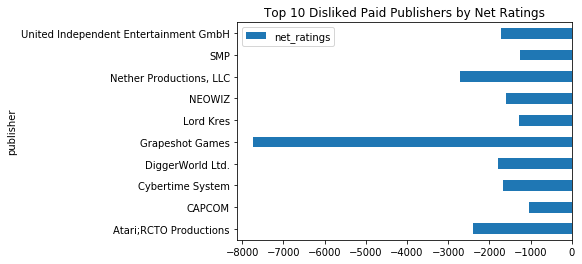

In [144]:
plot = top_disliked_paid_df.plot(y='net_ratings', kind='barh', title=f'Top {len(top_disliked_paid_df)} Disliked Paid Publishers by Net Ratings')
plt.show()

fig = plot.get_figure()
fig.savefig('Top Disliked Paid Publishers by Net Ratings',dpi=200, bbox_inches='tight')


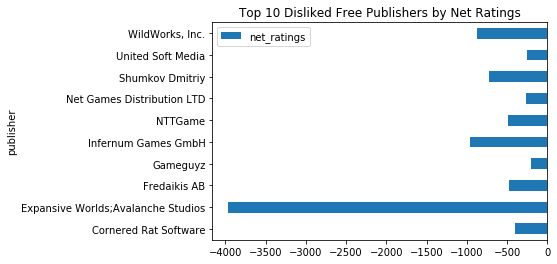

In [145]:
plot = top_disliked_free_df.plot(y='net_ratings', kind='barh', title=f'Top {len(top_disliked_free_df)} Disliked Free Publishers by Net Ratings')
plt.show()

fig = plot.get_figure()
fig.savefig('Top Disliked Free Publishers by Net Ratings',dpi=200, bbox_inches='tight')
